In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv("salary_exp.csv")
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


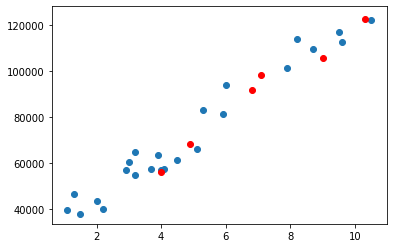

In [3]:
x = data['YearsExperience']
y = data[['Salary']]
x = x.values.reshape(-1, 1)
y = y.values.reshape(-1, 1)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=4)
plt.scatter(xtrain, ytrain,)
plt.scatter(xtest, ytest, color='red')
plt.show()

In [4]:
lr = LinearRegression()
lr.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

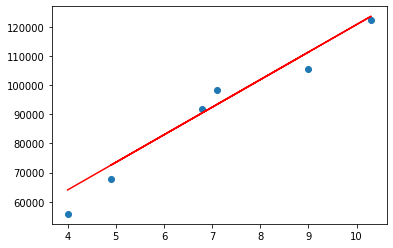

In [5]:
p = lr.predict(xtest)
plt.scatter(xtest, ytest,)
plt.plot(xtest, p, color='red')
plt.show()

In [6]:
mean_squared_error(ytest, p)

24942746.410306115

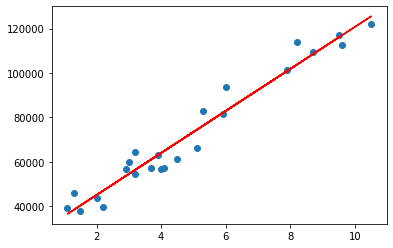

In [7]:
q = lr.predict(xtrain)
plt.scatter(xtrain, ytrain,)
plt.plot(xtrain, q, color='red')
plt.show()

In [8]:
mean_squared_error(ytrain, q)

33123245.136569276

In [9]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


# Preprocessing
Scaling operation is performed on data to reduce the MSE

In [10]:
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)

In [11]:
sc_y = StandardScaler()
ytrain = sc_y.fit_transform(ytrain)
ytest = sc_y.transform(ytest)

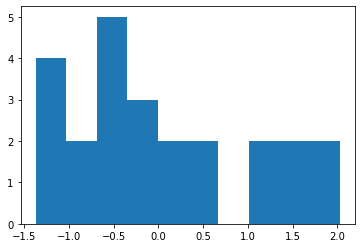

In [12]:
plt.hist(xtrain)
plt.show()

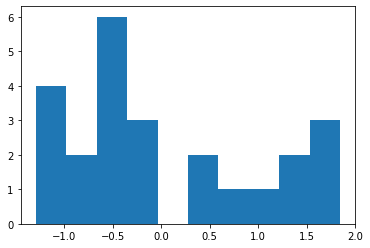

In [13]:
plt.hist(ytrain)
plt.show()

In [14]:
np.mean(xtrain), np.std(xtrain)

(-8.326672684688674e-17, 1.0)

In [15]:
np.mean(ytrain), np.std(ytrain)

(0.0, 0.9999999999999999)

In [16]:
lr.fit(xtrain, ytrain)
p = lr.predict(xtest)

In [17]:
mean_squared_error(ytest, p)

0.03471257666585596

In [18]:
q = lr.predict(xtrain)

In [19]:
mean_squared_error(ytrain, q)

0.04609729687786182

In [20]:
exp = 15
sample_pred = lr.predict(sc_x.transform([[exp]]))
sample_pred

array([[3.57241395]])

In [21]:
lr.predict(sample_pred)

array([[3.48910321]])

In [22]:
sample_pred = sc_y.inverse_transform(sample_pred)
sample_pred

array([[168193.64978843]])